<font size= 5pt> Data Analysis on the Mushroom Dataset</font><br><br>

In [1]:
# importing neccesary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('bmh')

<font size=5pt> Data preparation.</font>

In [2]:
col_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruise?', 'odor',
            'gill attachment', 'gill spacing', 'gill size', 'gill color', 'stalk shape',
            'stalk root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
             'stalk-color-above-ring',' stalk-color-below-ring', 'veil-type', 
             'veil color', 'ring number', 'ring type', 'spore-print-color', 'population', 'habitat']

p = 'data/agaricus-lepiota.csv'
df = pd.read_csv(p, header=None)
df.columns = col_names
df.head()
df1 = df.copy()

In [3]:
df1.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
_class = {'p': 'poisonous' , 'e':'edible'}
cap_shape = {'b':'bell','c': 'conical','x':'convex','f':'flat',"k": "knobbed","s":'sunken'}
cap_surf = {"f":'fibrous',"g":'grooves:',"y":'scaly',"s":'smooth'}

cap_col = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"r":'green',
                                  "p":'pink',"u":'purple',"e":'red',"w":'white',"y":'yellow'}
brui = {"t":'bruises',"f":'no'}
od = {"a":'almond',"l":'anise',"c":'creosote',"y":'fishy',"f":'foul',
                                  "m":'musty',"n":'none',"p":'pungent',"s":'spicy'}

gil_attch = {"a":'attached',"d":'descending',"f":'free',"n":'notched'}
gill_sp = {"c":'close',"w":'crowded',"d":'distant'}
gill_siz = {"b":'broad',"n":'narrow'}

gil_col = {"k":'black',"n":'brown',"b":'buff',"h":'chocolate',"g":'gray',  "r":'green',"o":'orange',
                                "p":'pink',"u":'purple',"e":'red',
                                  "w":'white',"y":'yellow'}
stalk_shape = {"e":'enlarging',"t":'tapering'}
stalk_root = {"b": 'bulbous',"c":'club',"u":'cup',"e":'equal',
                                  "z":'rhizomorphs',"r":'rooted',"?":'missing'}
ssar = {"f":'fibrous',"y":'scaly',"k":'silky',"s":'smooth'}
ssbr = {"f":'fibrous',"y":'scaly',"k":'silky',"s":'smooth'}
scar = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"o":'orange',
                                  "p":'pink',"e":'red',"w":'white',"y":'yellow'}

sbar = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"o":'orange',
                                  "p":'pink',"e":'red',"w":'white',"y":'yellow'}

veil_typ = {"p": 'partial',"u":'universal'}
veil_col = {"n":'brown',"o":'orange',"w":'white',"y":'yellow'}
ring_num = {"n":'none',"o":'one',"t":'two'}

ring_type = {"c":'cobwebby',"e":'evanescent',"f":'flaring',"l":'large',
                                  "n":'none',"p":'pendant',"s":'sheathing',"z":'zone'}

spc = {"k":'black',"n":'brown',"b":'buff',"h":'chocolate',"r":'green',
                                  "o":'orange',"u":'purple',"w":'white',"y":'yellow'}

pop = {"a":'abundant',"c":'clustered',"n":'numerous',
                                  "s":'scattered',"v":'several',"y":'solitary'}

hab = {'g':'grasses','l':'leaves',"m":'meadows',"p":'paths',
                                 "u": 'urban',"w":'waste',"d":'woods'}

new_names = [_class, cap_shape, cap_surf, cap_col, brui, od, gil_attch, gill_sp, gill_siz, gil_col,
            stalk_shape, stalk_root, ssar, ssbr, scar, sbar, veil_typ, veil_col, ring_num, ring_type,
            spc, pop, hab]

In [5]:
for col, name in zip(col_names,new_names):
    df1[col] = df1[col].replace(name)   

In [6]:
df1.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [64]:
# checking for missing values
df1.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruise?                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
 stalk-color-below-ring     0
veil-type                   0
veil color                  0
ring number                 0
ring type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [72]:
# summary statistics of the dataset
df1.describe().T

,count,unique,top,freq
class,8124,2,edible,4208
cap_shape,8124,6,convex,3656
cap_surface,8124,4,scaly,3244
cap_color,8124,10,brown,2284
bruise?,8124,2,no,4748
odor,8124,9,none,3528
gill attachment,8124,2,free,7914
gill spacing,8124,2,close,6812
gill size,8124,2,broad,5612
gill color,8124,12,buff,1728


<font size = 5pt> Looking at the data </font>

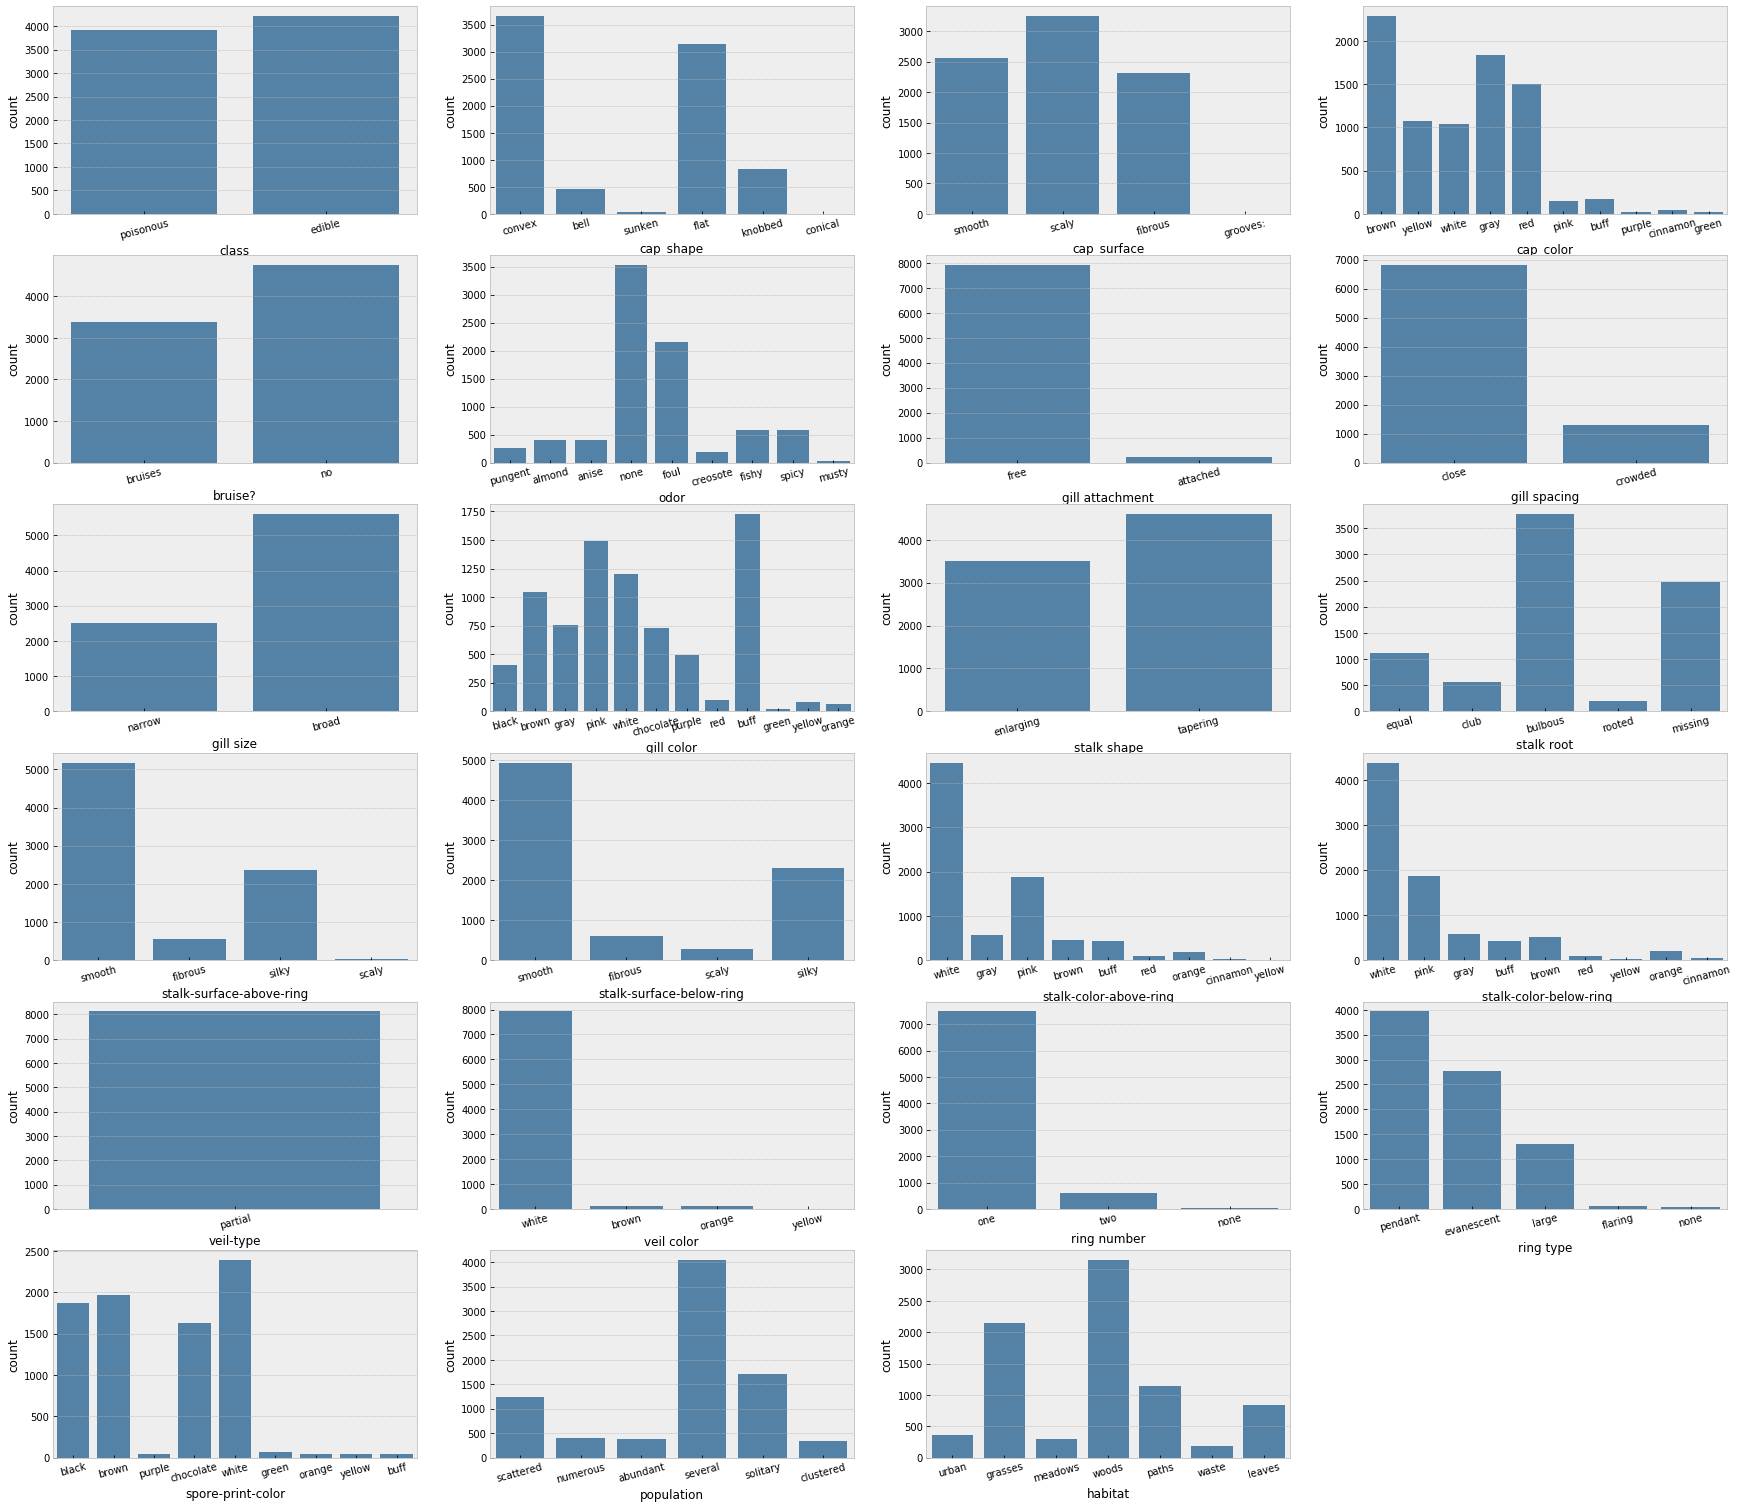

In [19]:
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(df1[col], color= 'steelblue')
    plt.xticks(rotation=15)

In [10]:
df1['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

In [11]:
df1['class'].value_counts(normalize = True)

edible       0.517971
poisonous    0.482029
Name: class, dtype: float64

The figure above shows the counts of instance in the dataset,as you can see there is a lot of variablity in the counts.
* Many of them are not balance, example is the **gill attachment, veil type, ring number chart** and others in the figure.<br>
* The data contains only **partial** in the veil type chart, none of **universal** was recorded.<br>
* We can also notice that white veil color was the most dominant of them all.<br>

Luckly, the **class** feature is well balanced,making it easy for the classifier to generalize the data well without any bias.

<font size= 5pt>Univariate analysis for <b>poisonous mushrooms</b> only.</font>

In [10]:
poi = df1[df1['class'] == 'poisonous']

In [11]:
poi.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
13,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,several,urban
17,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,grasses


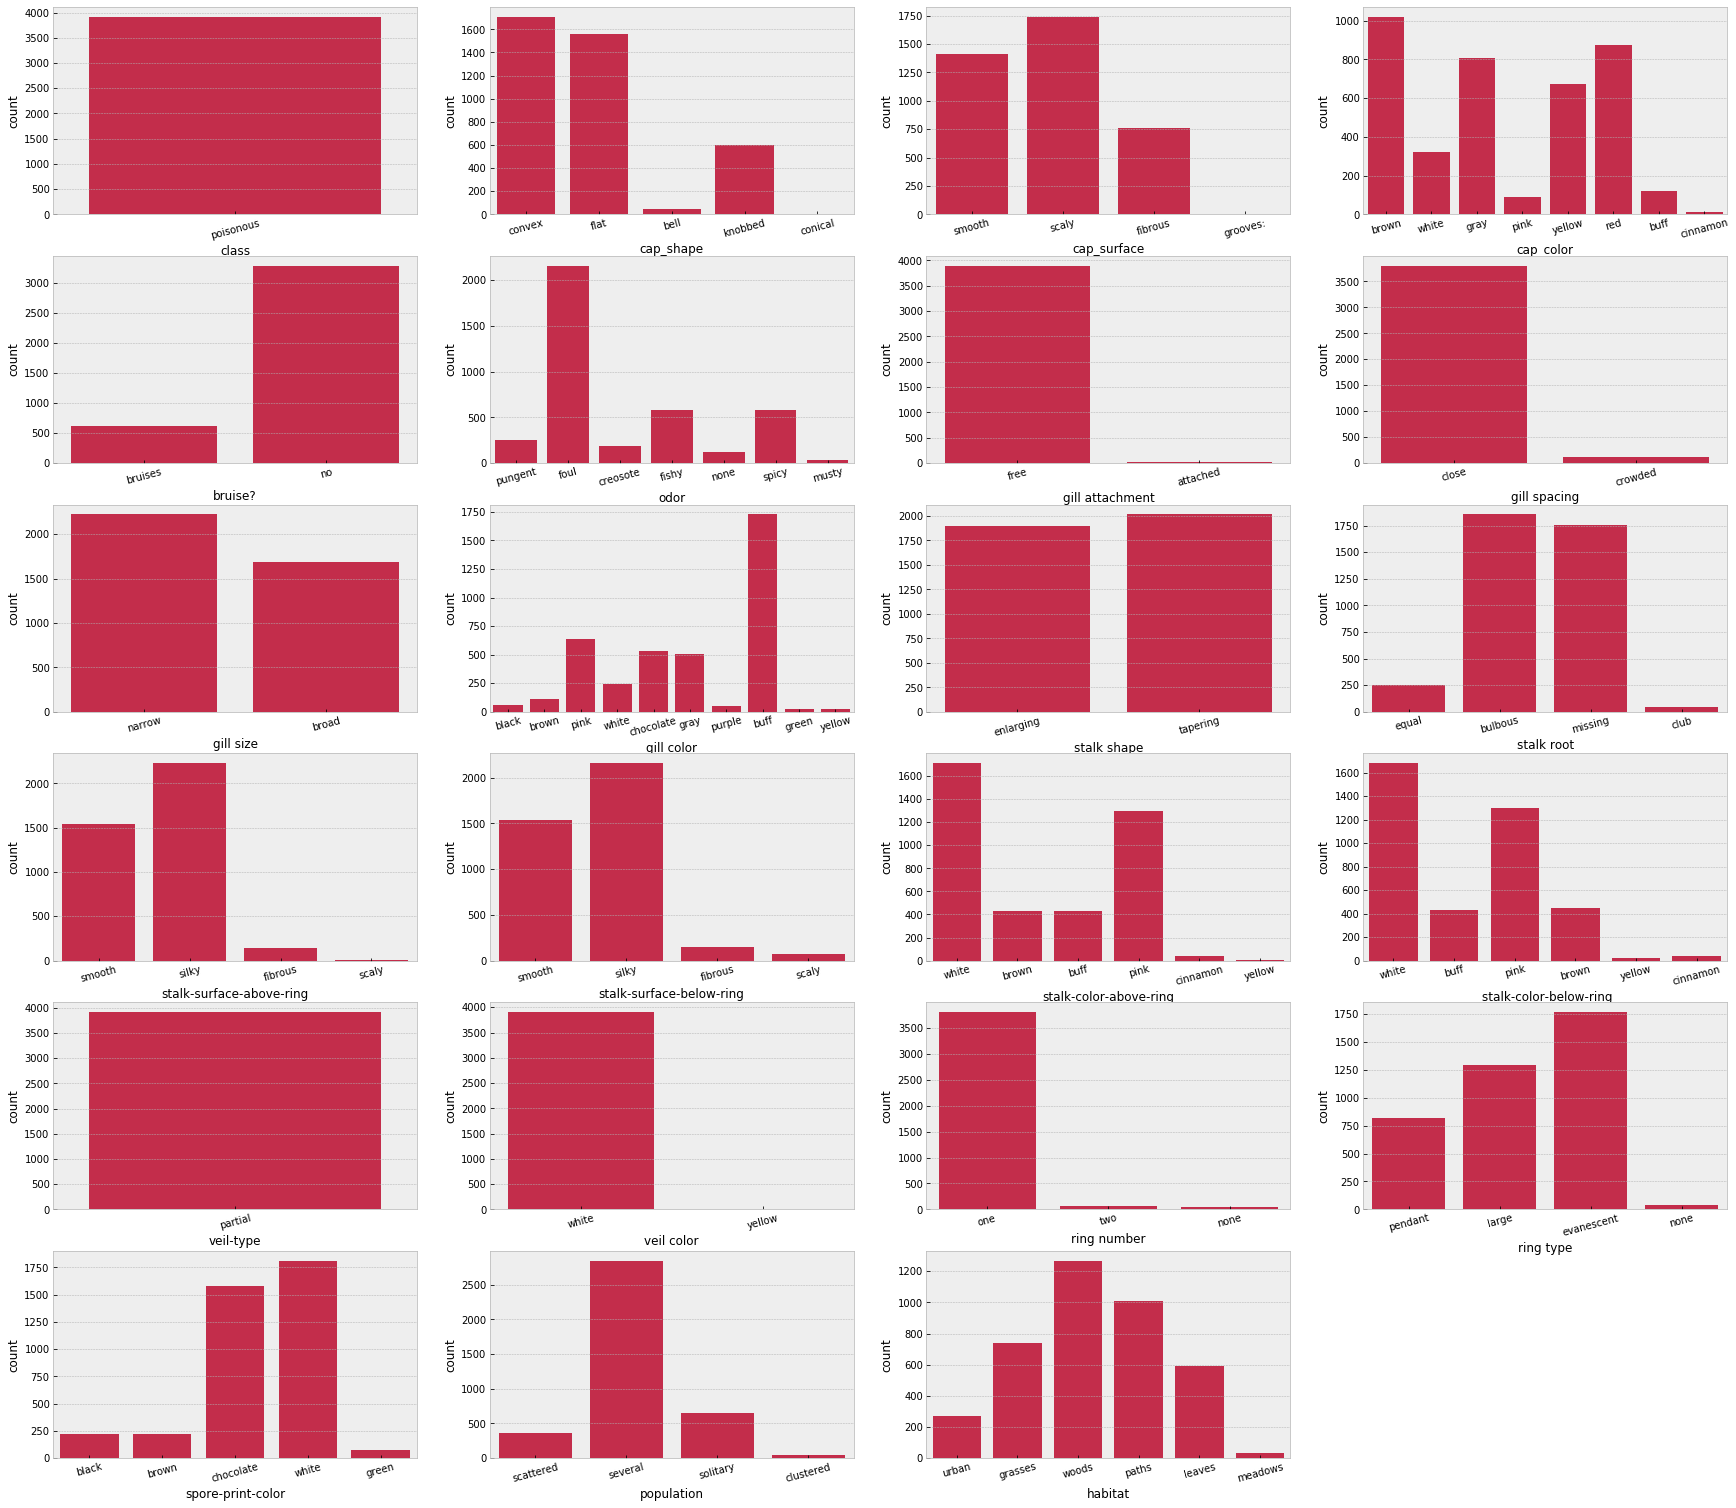

In [20]:
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(poi[col], color= 'crimson')
    plt.xticks(rotation=15)

The counts features for the poisonous mushrooms only is not really different from that of the edible ones.<br> 
Except that:
* The count of bruised poisonous mushrooms is lower than that ooof the edible mushrooms.
* Most of the poisonous have foul odor as compared to the edible ones.
* Gill spacing of the poisonous mushrooms is less crowded than the gill spacing of the edible mushrooms.
* Most gill clor of the poisonous mushrooms have **buff** color.

<font size= 5pt>Univariate analysis for <b>edible mushrooms</b> only.</font>

In [21]:
edi = df1[df1['class'] == 'edible']

In [22]:
edi.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows


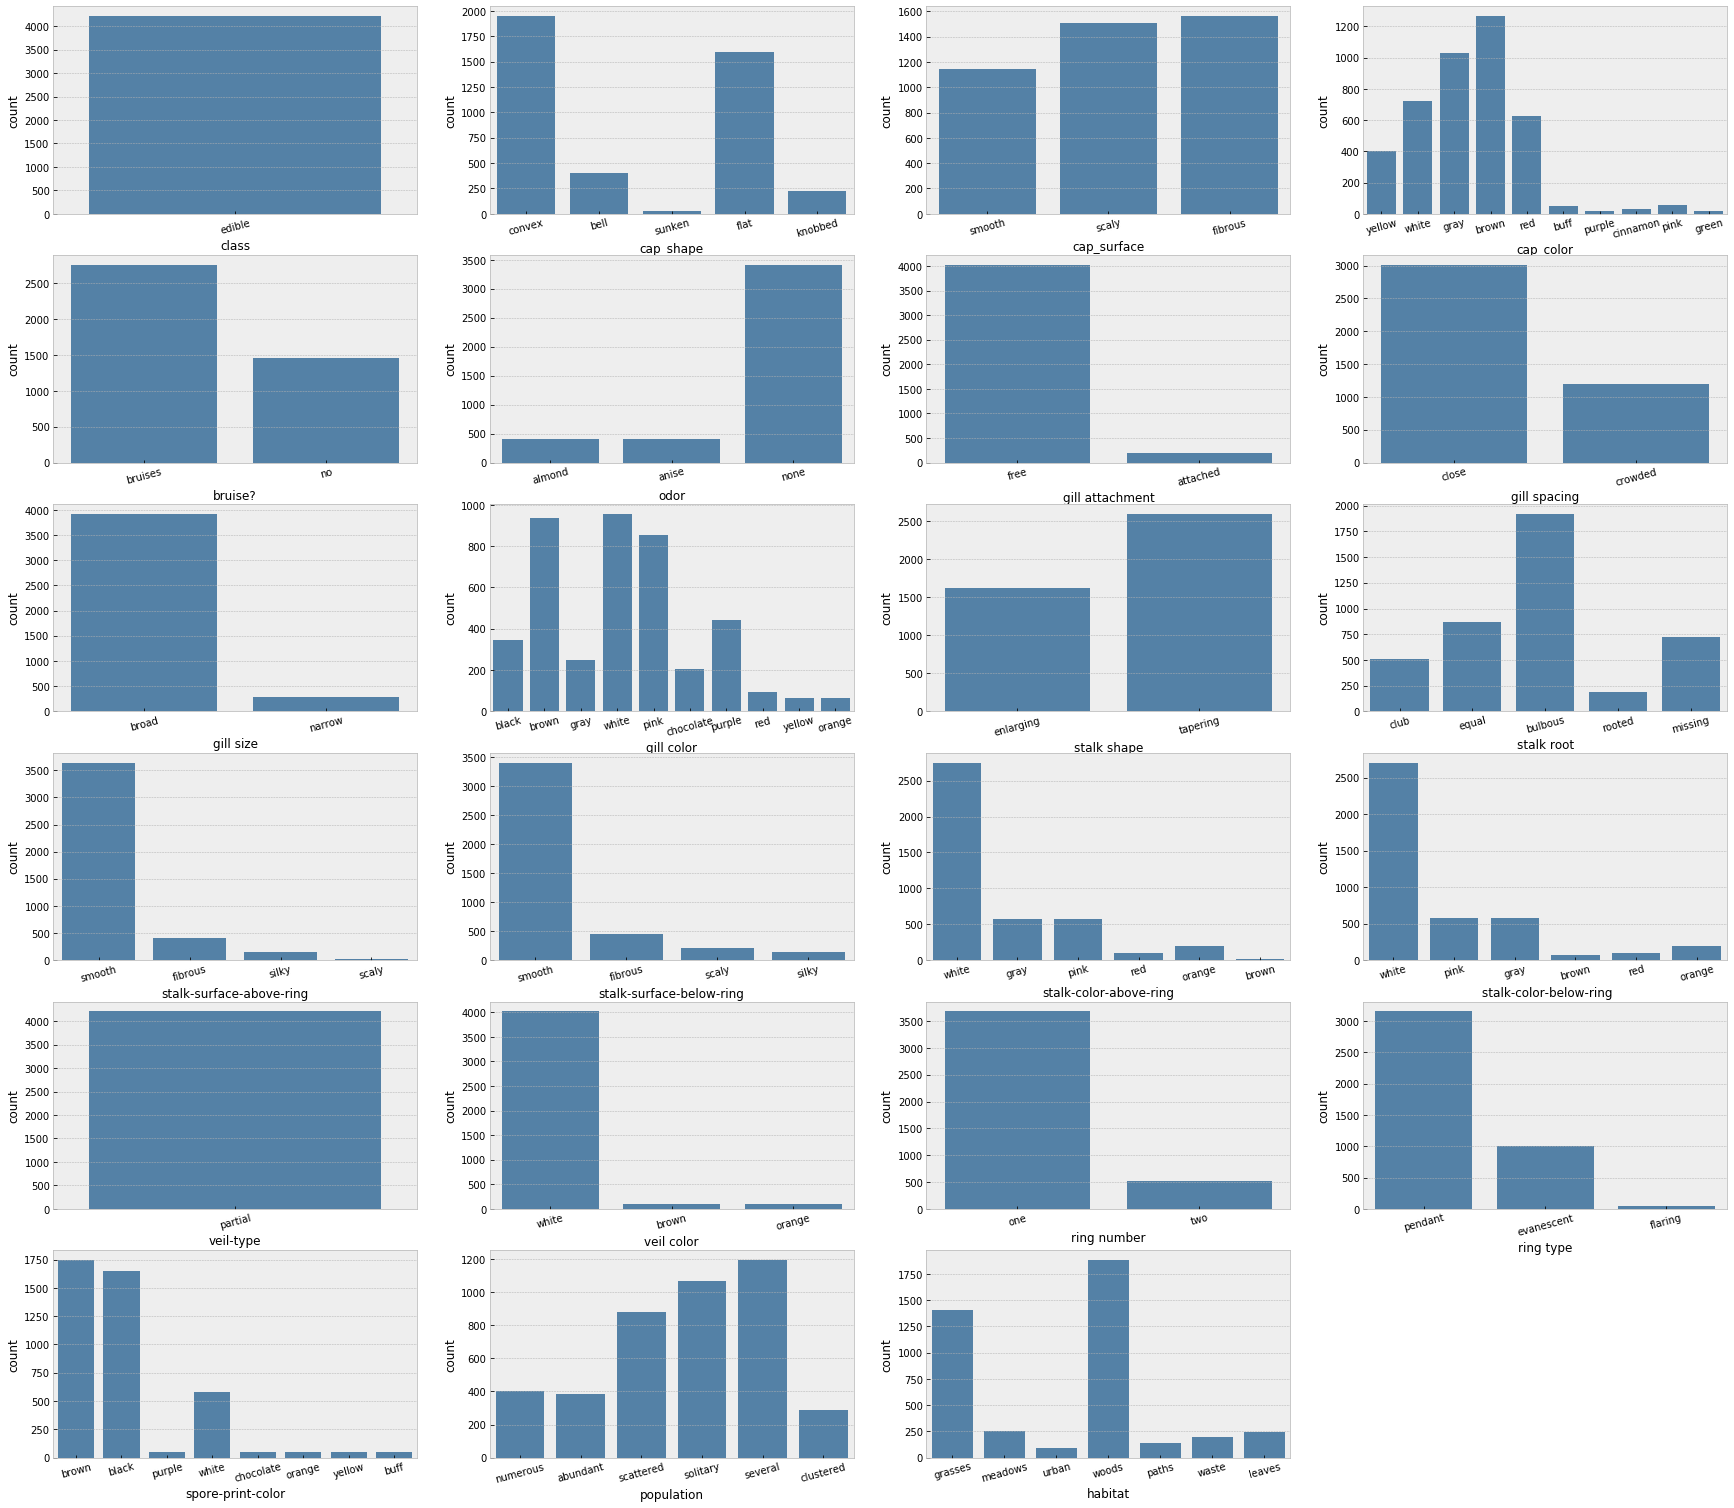

In [23]:
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(edi[col], color= 'steelblue')
    plt.xticks(rotation=15)

Most observations of the edible mushrooms is quite the opposite of that of the poisonous ones.
See that:
* The count of bruised edible mushrooms is higher than that ooof the poisonous mushrooms.
* Most of the edible mushrooms do not have any distinct odor.
* Gill spacing of the edible mushrooms is more crowded than the gill spacing of the poisonous mushrooms.
* Most gill color of the edible mushrooms have **black, brown and white** color.


<font size= 5pt> Bivariate analysis of the data</font>

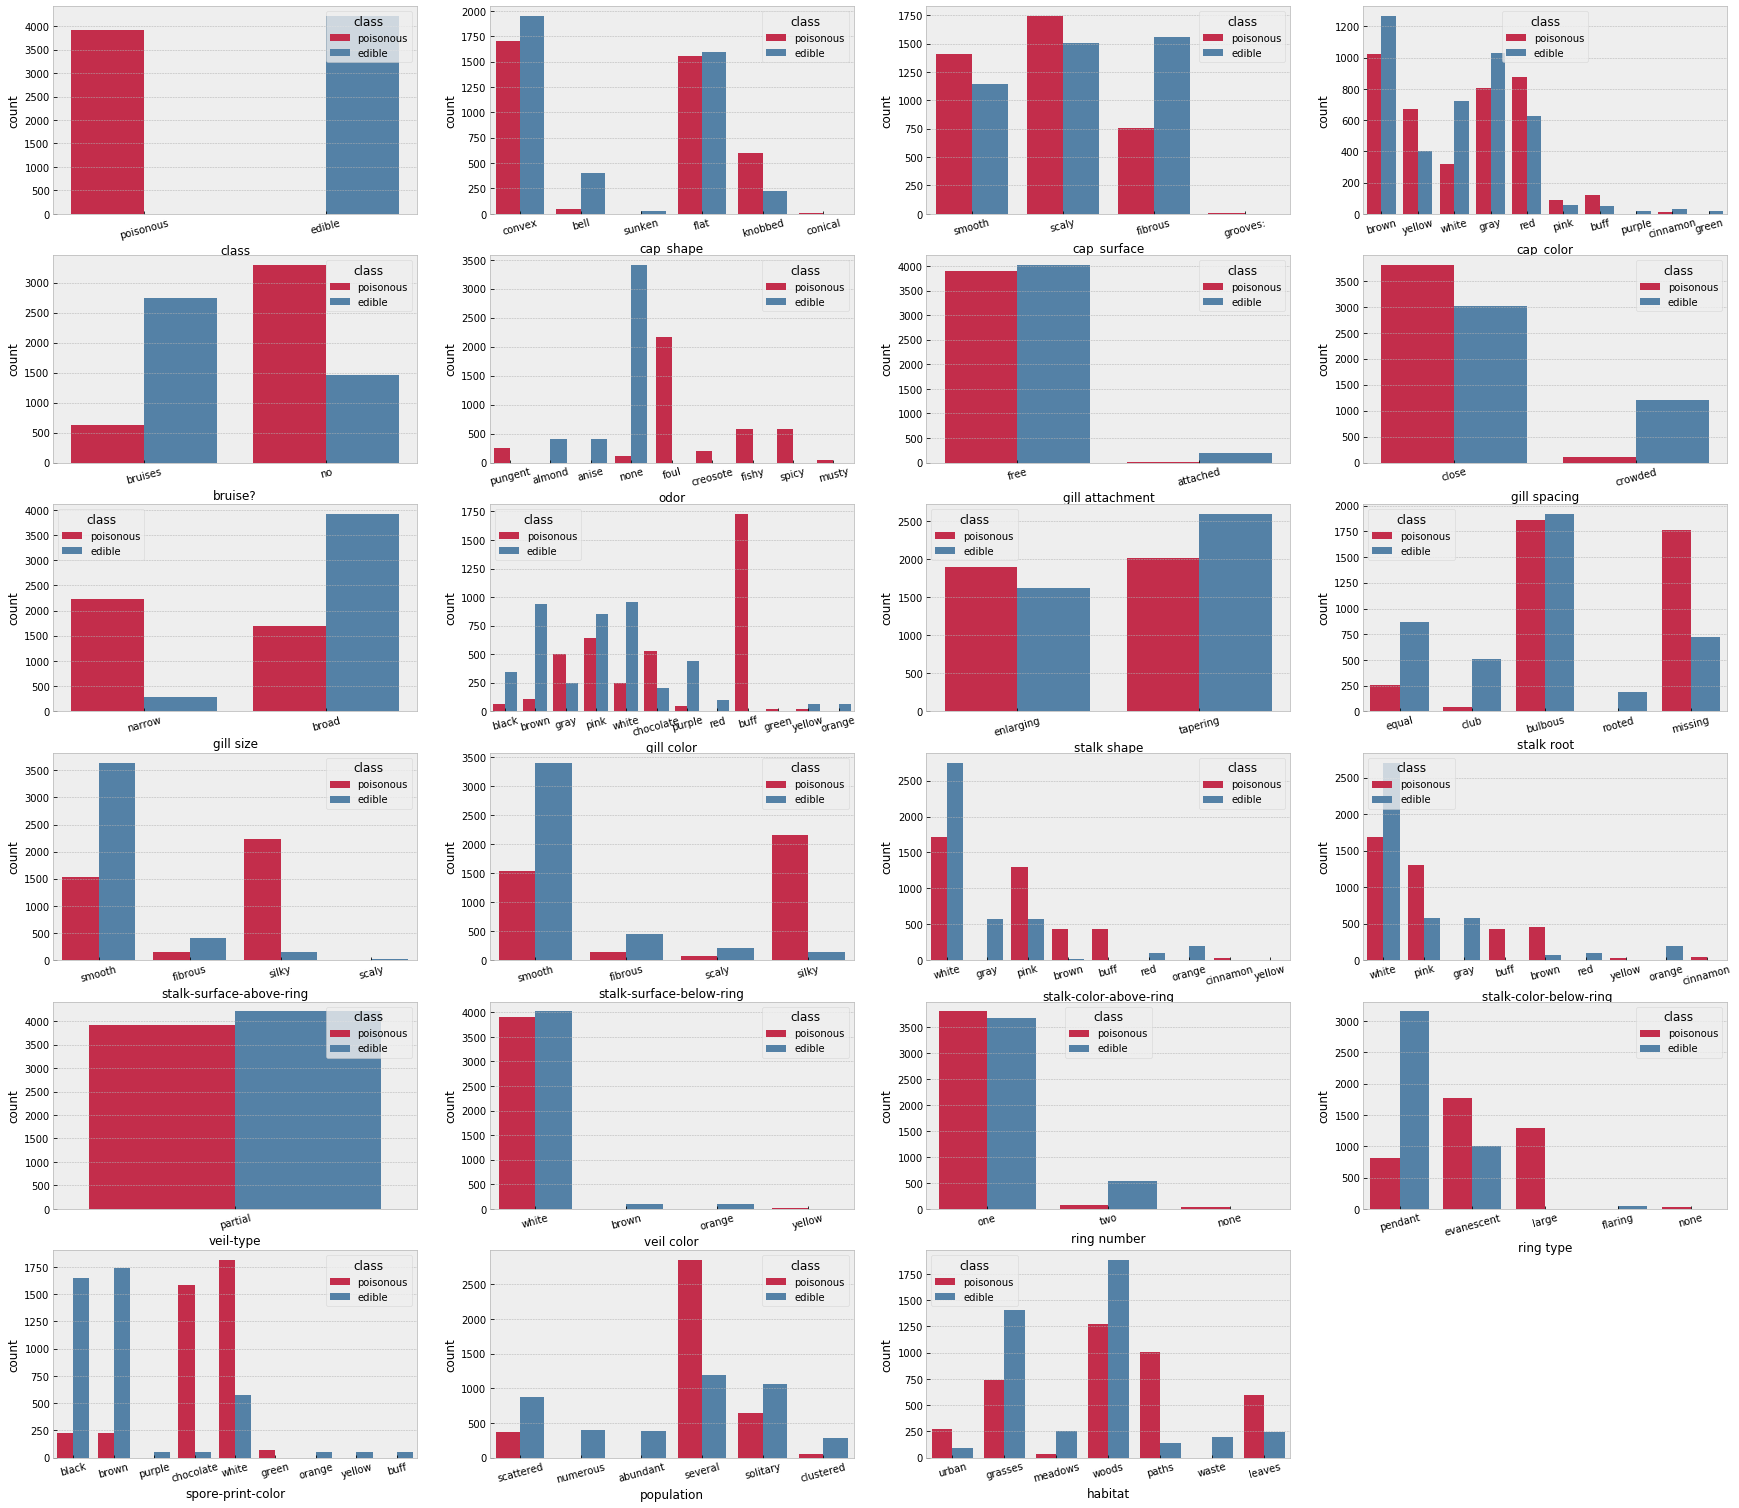

In [24]:
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(x = df1[col], hue= 'class', palette= ['crimson', 'steelblue'], data= df1)
    plt.xticks(rotation=15)
    

The chart above, counts of of each features of the poisonous and the edible mushrooms plotted side-by-side.

<font size=5pt> Performing data profiling</font>

In [31]:
"""
Pandas profiling a quick exploratory data analysis of the data we are working with.
"""
import pandas_profiling

profile= pandas_profiling.ProfileReport(df1)

# the output is saved as an html file in the current directory.
profile.to_file('mushroom_data_profiling.html') 

<font color= 'steelblue' size= 5.5pt> Habitat </font>

In [11]:
pd.crosstab(  df1['habitat'],  df1['class'])

class,edible,poisonous
habitat,,
grasses,1408,740
leaves,240,592
meadows,256,36
paths,136,1008
urban,96,272
waste,192,0
woods,1880,1268


The cross tabulation even suggests that our rule can be wrong sometimes some mushrooms grown on grasses was poisonous
while some grown on woods trees was edible too.

<font size= 6pt>Contingent tables of some features.</font><br>

<font color= 'steelblue' size=5.5pt> Cap shape </font>

In [34]:
pd.crosstab( df1['cap_shape'], df1['class'] )

class,edible,poisonous
cap_shape,,
bell,404,48
conical,0,4
convex,1948,1708
flat,1596,1556
knobbed,228,600
sunken,32,0


See that not all convexed shape mushrooms are edible, and not all flatten mushrooms are edible too.

<font color= 'steelblue' size=5.5pt>Gill attachment and color </font>

In [35]:
# gill attachement
pd.crosstab(  df1['gill attachment'], df1['class'])

class,edible,poisonous
gill attachment,,
attached,192,18
free,4016,3898


In [13]:
# gill color
pd.crosstab(  df1['gill color'], df1['class'])

class,edible,poisonous
gill color,,
black,344,64
brown,936,112
buff,0,1728
chocolate,204,528
gray,248,504
green,0,24
orange,64,0
pink,852,640
purple,444,48


**Black, brown** color of mushrooms being edible is not that right all the time either.

<font color= 'steelblue' size=5.5pt> Smell </font>

In [14]:
pd.crosstab( df1['odor'], df1['class'])

class,edible,poisonous
odor,,
almond,400,0
anise,400,0
creosote,0,192
fishy,0,576
foul,0,2160
musty,0,36
none,3408,120
pungent,0,256
spicy,0,576


It looks like our generalization about the **almond** scented mushrooms being edible is right.

<font size= 5.5pt color='steelblue'>Conclusion:</font><br>
Even though, there are general rules for determining whether a mushroom is edible or not. They can't always be true. but with the existence of past data collected, we could feed these data to a machine learning model to do the generalization for us with good accuracy/precision/recall, whatever metrics we will be using.

In [15]:
# save data
df1.to_csv('data/cleaned_mushroom.csv')